## DSGA_1003 HW2 codes (Yoon Tae Park, yp2201@nyu.edu)

### Q4.
Modify function feature normalization to normalize all the features to [0, 1]. Can you use numpy’s broadcasting here? Often broadcasting can help to simplify and/or speed up your code. Note that a feature with constant value cannot be normalized in this way. Your function should discard features that are constant in the training set.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#######################################
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    # TODO
    # discard features that are constant in the training set
    train = train[:, ~np.all(train[1:] == train[:-1], axis=0)]
    
    # normalizing    
    train_normalized = (train - np.min(train, axis=0)) / (np.max(train, axis=0) - np.min(train, axis=0))
    test_normalized = (test - np.min(train, axis=0)) / (np.max(train, axis=0) - np.min(train, axis=0))
    
    return train_normalized, test_normalized

In [2]:
def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('./ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]
    
    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)
    
    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    
    return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = load_data()
X_train, y_train, X_test, y_test

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


(array([[1.        , 1.        , 1.        , ..., 0.13241261, 0.13241261,
         1.        ],
        [1.        , 1.        , 1.        , ..., 0.92975578, 0.92975578,
         1.        ],
        [1.        , 1.        , 1.        , ..., 0.91055382, 0.91055382,
         1.        ],
        ...,
        [1.        , 0.        , 0.        , ..., 0.04886354, 0.04886354,
         1.        ],
        [1.        , 1.        , 1.        , ..., 0.58441163, 0.58441163,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.03210449, 0.03210449,
         1.        ]]),
 array([-2.79297326,  4.73657935,  1.43620799,  2.0695775 ,  3.94312311,
         1.76617561,  0.91611135,  0.76990084,  1.60681512,  3.36768284,
         1.79293615,  3.08832928, -2.02132147, -4.00773921,  2.48052193,
         4.38447731,  0.91950092, -2.82605222, -0.60886527, -3.83638829,
        -1.60157351,  0.22826982, -2.58186731, -2.56092793, -3.34526159,
         4.50269335, -4.44969556, -4.2302018

### Q8.
Modify the function compute square loss, to compute J(θ) for a given θ. You might want to create a small dataset for which you can compute J(θ) by hand, and verify that your compute square loss function returns the correct value.

In [4]:
#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
    #TODO
    # Recall that formula  J(θ) is (1/m) * (∥Xb − y∥2)^2, where m = X.shape[0]
    loss = (1 / X.shape[0]) * (np.linalg.norm((X @ theta) - y) ** 2)
    return loss

In [5]:
# Verify compute_square_loss function
theta = np.zeros(X_train.shape[1], )
compute_square_loss(X_train, y_train, theta)

7.961518343622414

### Q9. 
Modify the function compute square loss gradient, to compute ∇θJ(θ). You may again want to use a small dataset to verify that your compute square loss gradient function returns the correct value.

In [6]:
#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    # Recall that formula is (2/m) * (X.T @ X @ theta - X.T @ y), where m = X.shape[0]
    grad = (2 / X.shape[0]) * ((X.T @ X @ theta) - (X.T @ y))
    return grad

In [7]:
# Verify compute_square_loss_gradient function
theta = np.zeros(X_train.shape[1], )
compute_square_loss_gradient(X_train, y_train, theta)

array([ 0.25182065, -0.15015092, -0.40509526, -0.48635482, -0.09047498,
       -0.14102752, -0.19706508, -0.19706508, -0.43171119, -0.64257159,
       -0.69600073, -0.37699938, -0.00881756,  0.1961221 , -0.61472345,
       -0.71499271, -0.57656883, -0.11765843, -0.16572975, -0.16572975,
       -0.16572975, -0.2405182 , -0.2405182 , -0.2405182 , -0.25532376,
       -0.25532376, -0.25532376, -0.26195435, -0.26195435, -0.26195435,
       -0.2655612 , -0.2655612 , -0.2655612 , -0.29115783, -0.29115783,
       -0.29115783, -0.32684613, -0.32684613, -0.32684613, -0.30492033,
       -0.30492033, -0.30492033, -0.29459583, -0.29459583, -0.29459583,
       -0.28881282, -0.28881282, -0.28881282,  0.36972349])

### Q10. 
Complete the function grad checker according to the documentation of the function given
in the skeleton code.py. Alternatively, you may complete the function generic grad checker so which can work for any objective function.

In [8]:
#######################################
### Gradient checker
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate

    #TODO    
    # create an d*d array with ones on the diagonal and zeros elsewhere, where d = X.shape[1]
    e_i = np.eye(X.shape[1])
    
    # update approx_grad with formula: (J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon)
    for i in range(X.shape[1]):
        j_plus = compute_square_loss(X, y, theta + (epsilon * e_i[i]))
        j_minus = compute_square_loss(X, y, theta - (epsilon * e_i[i]))
        approx_grad[i] = (j_plus - j_minus)/(2 * epsilon)
    
    # Euclidean distance
    euc_dist = np.linalg.norm(approx_grad - true_gradient)

    # If the Euclidean distance exceeds tolerance, we say the gradient is incorrect.
    if euc_dist > tolerance:
        return False    
    
    # If not, return True
    return True    

In [9]:
# test
theta = np.zeros(49,)
grad_checker(X_train, y_train, theta, epsilon=0.01, tolerance=1e-4)

True

### Q11. 
Complete batch gradient descent. Note the phrase batch gradient descent distinguishes
between stochastic gradient descent or more generally minibatch gradient descent.

In [10]:
#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):

    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    
    #TODO
    # update theta_hist and loss_hist
    for i in range(num_step+1):
        theta_hist[i, :] = theta
        loss_hist[i] = compute_square_loss(X, y, theta) 
        
        theta -= alpha * compute_square_loss_gradient(X, y, theta)    
        
        # if grad_check is still False, then break the loop and return result
        grad_check = grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4)
    
        if grad_check == True:
            assert(grad_checker)

    
    return theta_hist, loss_hist

### Q12. 
Now let’s experiment with the step size. Note that if the step size is too large, gradient descent may not converge. Starting with a step-size of 0.1, try various different fixed step sizes to see which converges most quickly and/or which diverge. As a minimum, try step sizes 0.5, 0.1, .05, and .01. Plot the average square loss on the training set as a function of the number of steps for each step size. Briefly summarize your findings.


<b> Ans)   
For large step sizes (alpha = 0.5, 0.1), loss doesn't seem to converge.  
However, as we use small step sizes(alpha = 0.05, 0.01), it converges.   

Also, as we use more small step sizes(alpha = 0.01), it converges more slowly.  
In plot, we can see that alpha = 0.05 converges most quickly among other alphas</b>

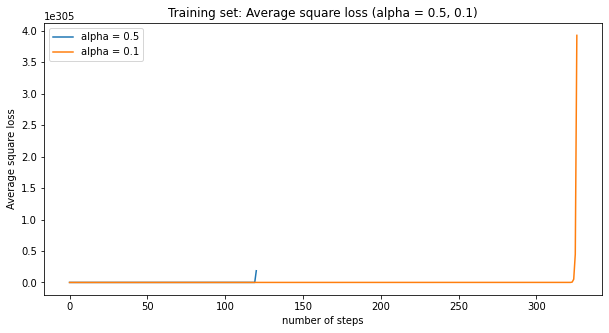

In [11]:
plt.figure(figsize= (10,5))
alpha = 0.5
theta_hist_1, loss_hist_1 = batch_grad_descent(X_train, y_train, alpha=alpha, num_step=1000, grad_check=False)
plt.plot(np.arange(loss_hist_1.shape[0]), loss_hist_1, label = 'alpha = {}'.format(alpha))

alpha = 0.1
theta_hist_2, loss_hist_2 = batch_grad_descent(X_train, y_train, alpha=alpha, num_step=1000, grad_check=False)
plt.plot(np.arange(loss_hist_2.shape[0]), loss_hist_2, label = 'alpha = {}'.format(alpha))

plt.title('Training set: Average square loss (alpha = 0.5, 0.1)')
plt.xlabel('number of steps')
plt.ylabel('Average square loss')
plt.legend()
plt.show()

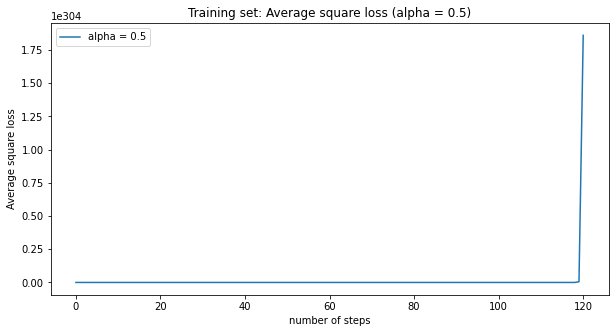

In [12]:
plt.figure(figsize= (10,5))
alpha = 0.5
theta_hist_1, loss_hist_1 = batch_grad_descent(X_train, y_train, alpha=alpha, num_step=1000, grad_check=False)
plt.plot(np.arange(loss_hist_1.shape[0]), loss_hist_1, label = 'alpha = {}'.format(alpha))

plt.title('Training set: Average square loss (alpha = 0.5)')
plt.xlabel('number of steps')
plt.ylabel('Average square loss')
plt.legend()
plt.show()

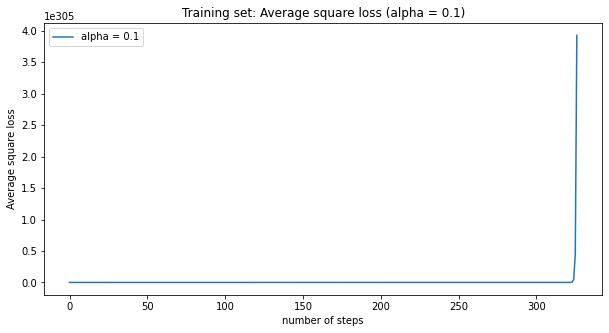

In [13]:
plt.figure(figsize= (10,5))
alpha = 0.1
theta_hist_2, loss_hist_2 = batch_grad_descent(X_train, y_train, alpha=alpha, num_step=1000, grad_check=False)
plt.plot(np.arange(loss_hist_2.shape[0]), loss_hist_2, label = 'alpha = {}'.format(alpha))

plt.title('Training set: Average square loss (alpha = 0.1)')
plt.xlabel('number of steps')
plt.ylabel('Average square loss')
plt.legend()
plt.show()

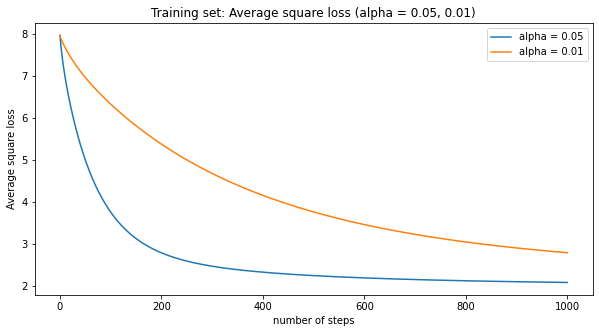

In [14]:
plt.figure(figsize= (10,5))
alpha = 0.05
theta_hist_3, loss_hist_3 = batch_grad_descent(X_train, y_train, alpha=alpha, num_step=1000, grad_check=False)
plt.plot(np.arange(loss_hist_3.shape[0]), loss_hist_3, label = 'alpha = {}'.format(alpha))

alpha = 0.01
theta_hist_4, loss_hist_4 = batch_grad_descent(X_train, y_train, alpha=alpha, num_step=1000, grad_check=False)
plt.plot(np.arange(loss_hist_4.shape[0]), loss_hist_4, label = 'alpha = {}'.format(alpha))

plt.title('Training set: Average square loss (alpha = 0.05, 0.01)')
plt.xlabel('number of steps')
plt.ylabel('Average square loss')
plt.legend()
plt.show()

### Q13. 
For the learning rate you selected above, plot the average test loss as a function of the
iterations. You should observe overfitting: the test error first decreases and then increases.


<b> Ans) For learning rate: 0.05, test error first decreases and then increases. (Overfitting)</b>

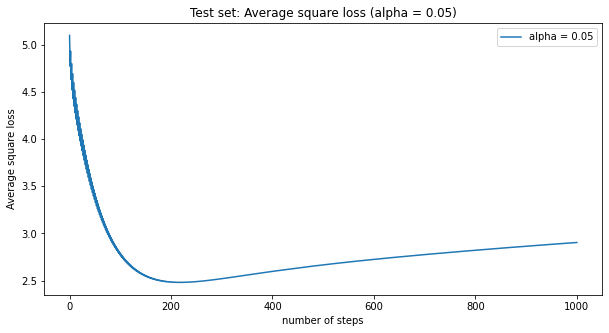

In [15]:
# alpha = 0.05
num_step = 1000
loss_hist_test_3 = np.zeros(num_step + 1)  #Initialize loss_hist
for i in range(num_step+1):
    loss_hist_test_3[i] = compute_square_loss(X_test, y_test, theta_hist_3[i]) 
        
plt.figure(figsize= (10,5))
alpha = 0.05
plt.plot(np.arange(loss_hist_test_3.shape[0]), loss_hist_test_3, label = 'alpha = {}'.format(alpha))
plt.title('Test set: Average square loss (alpha = 0.05)')
plt.xlabel('number of steps')
plt.ylabel('Average square loss')
plt.legend()
plt.show() 

In [16]:
# # alpha = 0.5, 0.1
# num_step = 1000
# loss_hist_test_1 = np.zeros(num_step + 1)  #Initialize loss_hist
# for i in range(num_step+1):
#     loss_hist_test_1[i] = compute_square_loss(X_test, y_test, theta_hist_1[i]) 
        
# loss_hist_test_2 = np.zeros(num_step + 1)  #Initialize loss_hist
# for i in range(num_step+1):
#     loss_hist_test_2[i] = compute_square_loss(X_test, y_test, theta_hist_2[i])  

# plt.figure(figsize= (10,5))

# alpha = 0.5
# plt.plot(np.arange(loss_hist_test_1.shape[0]), loss_hist_test_1, label = 'alpha = {}'.format(alpha))

# alpha = 0.1
# plt.plot(np.arange(loss_hist_test_2.shape[0]), loss_hist_test_2, label = 'alpha = {}'.format(alpha))

# plt.title('Test set: Average square loss (alpha = 0.5, 0.1)')
# plt.xlabel('number of steps')
# plt.ylabel('Average square loss')
# plt.legend()
# plt.show()    

In [17]:
# # alpha = 0.05, 0.01
# num_step = 1000
# loss_hist_test_3 = np.zeros(num_step + 1)  #Initialize loss_hist
# for i in range(num_step+1):
#     loss_hist_test_3[i] = compute_square_loss(X_test, y_test, theta_hist_3[i]) 

# #     grad_check = grad_checker(X_test, y_test, theta_hist_3[i], epsilon=0.01, tolerance=1e-4)
# #     if grad_check == False: 
# #         break

        
# loss_hist_test_4 = np.zeros(num_step + 1)  #Initialize loss_hist
# for i in range(num_step+1):
#     loss_hist_test_4[i] = compute_square_loss(X_test, y_test, theta_hist_4[i]) 

# #     grad_check = grad_checker(X_test, y_test, theta_hist_4[i], epsilon=0.01, tolerance=1e-4)
# #     if grad_check == False: 
# #         break        

        
# plt.figure(figsize= (10,5))

# alpha = 0.05
# plt.plot(np.arange(loss_hist_test_3.shape[0]), loss_hist_test_3, label = 'alpha = {}'.format(alpha))

# alpha = 0.01
# plt.plot(np.arange(loss_hist_test_4.shape[0]), loss_hist_test_4, label = 'alpha = {}'.format(alpha))

# plt.title('Test set: Average square loss (alpha = 0.05, 0.01)')
# plt.xlabel('number of steps')
# plt.ylabel('Average square loss')
# plt.legend()
# plt.show()    

### Q15. 
Implement compute regularized square loss gradient.

In [18]:
#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    #TODO
    # Recall that formula is (2/m) * (X.T @ X @ theta - X.T @ y) + 2*lambda*theta, where m = X.shape[0]
    grad = (2 / X.shape[0]) * ((X.T @ X @ theta) - (X.T @ y)) + (2 * lambda_reg * theta)
    return grad

### Q16. 
Implement regularized grad descent.

In [19]:
#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    
    #TODO
    # update theta_hist and loss_hist
    for i in range(num_step+1):
        theta_hist[i, :] = theta
        loss_hist[i] = compute_square_loss(X, y, theta) 
        
        theta -= alpha * compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)   
    
    return theta_hist, loss_hist

Our goal is to find λ that gives the minimum average square loss on the test set. So you should start your search very broadly, looking over several orders of magnitude. For example, λ ∈ {10−7,10−5,10−3,10−1,1,10,100}. Then you can zoom in on the best range. Follow the steps below to proceed.

### Q17.
Choosing a reasonable step-size, plot training average square loss and the test average square loss (just the average square loss part, without the regularization, in each case) as a function of the training iterations for various values of λ. What do you notice in terms of overfitting?


<b> Ans) As we select some reasonable step-size such as lambda = 10**-7, 10**-5, 10**-3, we can see that overfitting occurs for given models.   
If we try to minimize train loss, then the model will overfit to the training set and it fails to predict test dataset, resulting increase in train loss.</b>

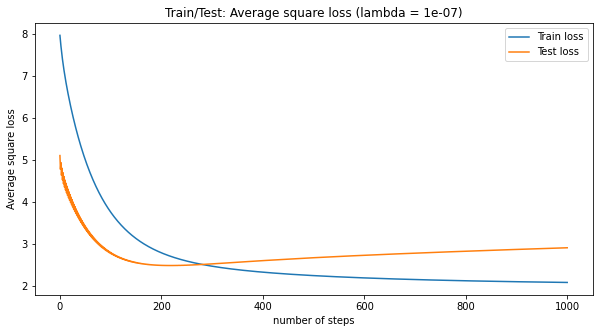

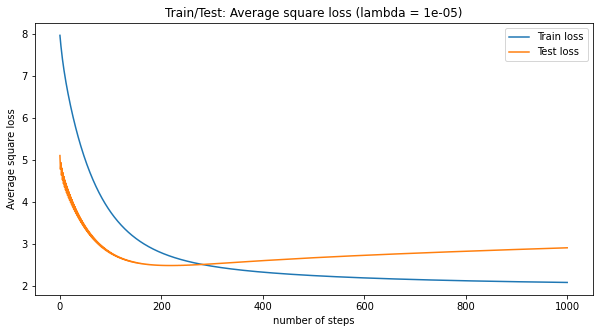

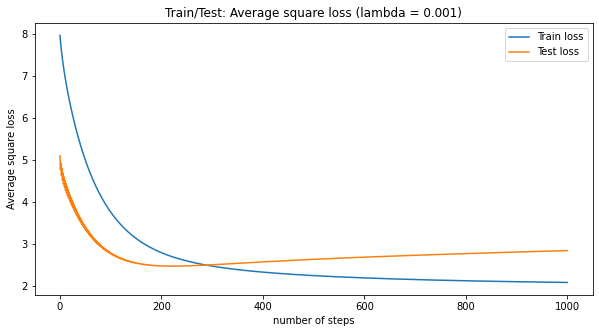

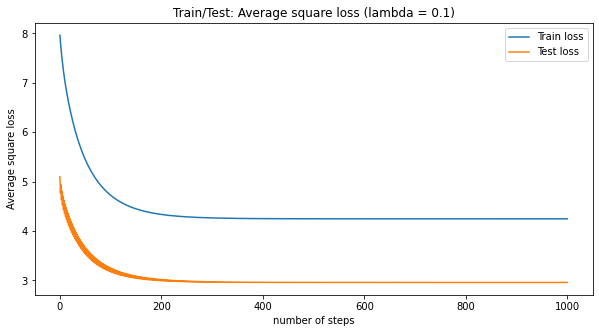

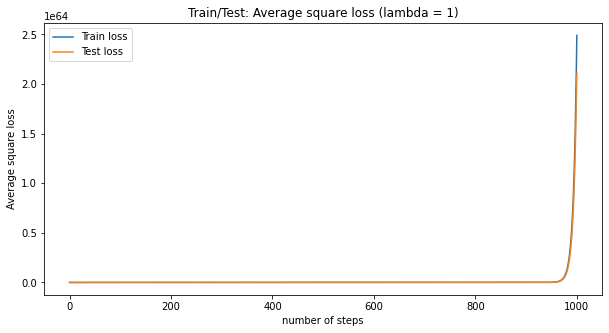

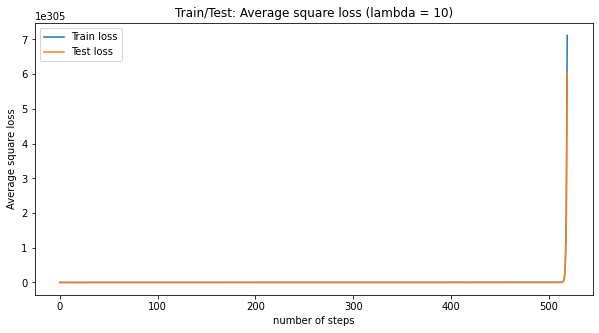

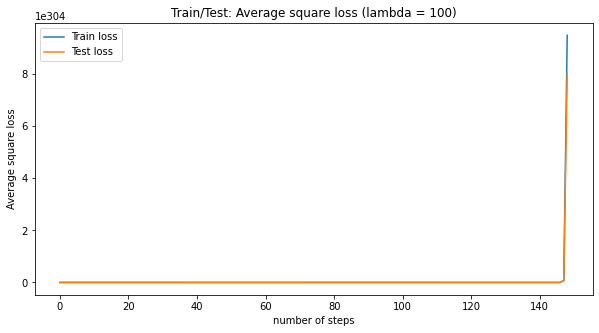

In [20]:
lambda_lists = [10**-7, 10**-5, 10**-3, 10**-1, 1, 10, 100]
alpha = 0.05 # step-size

for lambda_list in lambda_lists:
    plt.figure(figsize= (10,5))
    # train set
    theta_hist_train, loss_hist_train = regularized_grad_descent(X_train, y_train, alpha=0.05, \
                                                                 lambda_reg=lambda_list, num_step=1000)
    
    plt.plot(np.arange(loss_hist_train.shape[0]), loss_hist_train, label = 'Train loss')

    # test set
    num_step=1000
    loss_hist_test = np.zeros(num_step + 1)  #Initialize loss_hist
    for i in range(num_step+1):
        loss_hist_test[i] = compute_square_loss(X_test, y_test, theta_hist_train[i]) 

    plt.plot(np.arange(loss_hist_test.shape[0]), loss_hist_test, label = 'Test loss')

    plt.title('Train/Test: Average square loss (lambda = {})'.format(lambda_list))
    plt.xlabel('number of steps')
    plt.ylabel('Average square loss')
    plt.legend()
    plt.show()

### Q18. 
Plot the training average square loss and the test average square loss at the end of training as a function of λ. You may want to have log(λ) on the x-axis rather than λ. Which value of λ would you choose ?


<b>Ans) Select 10**-3, as it shows the lowest test loss(=2.845643139725183)</b>

train:  [2.077700614426301, 2.0778239254952293, 2.0913500007595975, 4.245811582850459]

test:  [2.9034175759537226, 2.9028345302242715, 2.847542512245568, 2.95771097107627]


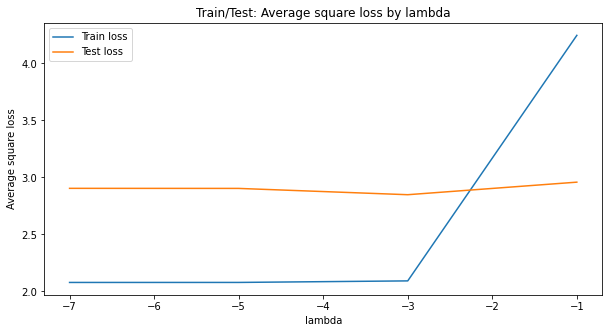

In [24]:
lambda_lists = [10**-7, 10**-5, 10**-3, 10**-1]
alpha = 0.05 # step-size

train_loss_by_lambda = []
test_loss_by_lambda = []

for lambda_list in lambda_lists:
    # train set
    theta_hist_train, loss_hist_train = regularized_grad_descent(X_train, y_train, alpha=alpha, \
                                                                 lambda_reg=lambda_list, num_step=1000)
    # Add the end of training result 
    train_loss_by_lambda.append(loss_hist_train[-1])

    # test set, calculate loss by using end of training theta
    test_loss_by_lambda.append(compute_square_loss(X_test, y_test, theta_hist_train[-1])) 

print('train: ', train_loss_by_lambda)
print()
print('test: ', test_loss_by_lambda)

plt.figure(figsize = (10,5))
plt.plot(np.log10(lambda_lists), train_loss_by_lambda, label = 'Train loss')
plt.plot(np.log10(lambda_lists), test_loss_by_lambda, label = 'Test loss')

plt.title('Train/Test: Average square loss by lambda')
plt.xlabel('lambda')
plt.ylabel('Average square loss')
plt.legend()
plt.show()

### Q19. 
Another heuristic of regularization is to early-stop the training when the test error reaches a minimum. Add to the last plot the minimum of the test average square loss along training as a function of λ. Is the value λ you would select with early stopping the same as before?


<b>Ans) In this step-size: 0.05, result is same and therefore select same λ = 10 **(-3)</b>

end:  [2.9034175759537226, 2.9028345302242715, 2.847542512245568, 2.95771097107627]

min:  [2.9034175759537226, 2.9028345302242715, 2.847542512245568, 2.95771097107627]


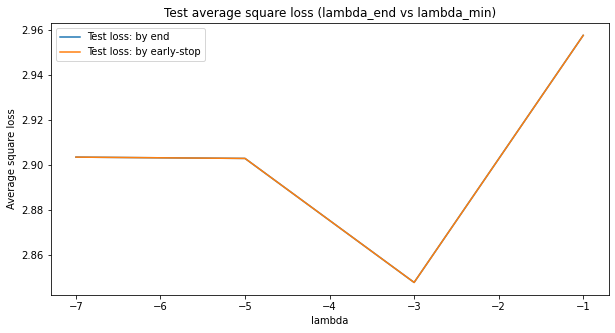

In [26]:
lambda_lists = [10**-7, 10**-5, 10**-3, 10**-1]
alpha = 0.05 # step-size
test_loss_by_lambda_end = []
test_loss_by_lambda_min = []

for lambda_list in lambda_lists:
    # this part is same as Q18, to calculate test loss by using last index
    # train dataset
    theta_hist_train, loss_hist_train = regularized_grad_descent(X_train, y_train, alpha=alpha, \
                                                                 lambda_reg=lambda_list, num_step=1000)
    
    # test set, calculate loss by using end of training theta
    test_loss_by_lambda_end.append(compute_square_loss(X_test, y_test, theta_hist_train[-1])) 
    
    
    # Assuming that minimum train error index is the early stop point, 
    # apply that index of train theta to test set 
    min_idx_train = np.argmin(loss_hist_train)
    test_loss_by_lambda_min.append(compute_square_loss(X_test, y_test, theta_hist_train[min_idx_train])) 
    
print('end: ', test_loss_by_lambda_end)
print()
print('min: ', test_loss_by_lambda_min)
    
plt.figure(figsize = (10,5))
plt.plot(np.log10(lambda_lists), test_loss_by_lambda_end, label = 'Test loss: by end')
plt.plot(np.log10(lambda_lists), test_loss_by_lambda_min, label = 'Test loss: by early-stop')

plt.title('Test average square loss (lambda_end vs lambda_min)')
plt.xlabel('lambda')
plt.ylabel('Average square loss')
plt.legend()
plt.show()

### Q20.
What λ would you select in practice and why?


<b>Ans) Select λ that best minimizes test error.
In practice, we divide train/test dataset, and our goal is to make a model that can predict well for new data.
So, it is reasonable to select λ that minimizes test error. We shouldn't select λ that minimizes train error, as that model can  overfit to train data and does not perform well in test dataset.

    
Also, we can think of some early stopping point when deciding test error for each given λ. We might not able to check entire dataset so making an early stop point when test error doesn't minimizes for some period of iteration(ex. early stop when you find that iteration doesn't decreases test error for next 50 times), or select among some given iteration (ex. early stop when you run model 200 times and find minimum test error)
</b>

### Optional (Q24~25)

### Optional) Q24. Implement stochastic grad descent.

In [23]:
### Stochastic gradient descent: C = 0.1
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, eta0=False):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    # initialize step_size as alpha
    step_size = alpha
    C = 0.1
    
    for epoch in range(num_epoch):
        # check alpha and confirm final step_size
        if type(alpha) == float:
            step_size = alpha
        elif alpha == '1/sqrt(t)':
            step_size = C * 1/np.sqrt(epoch+1)
        elif alpha == '1/t':
            step_size = C * (1/(epoch+1))
        
        # shuffle(randomize) index
        index = np.array(range(num_instances))
        np.random.shuffle(index)
        
        for j in index:
            # calculate theta and loss 
            theta_hist[epoch, j, :] = theta
            loss = compute_square_loss(X[j, :].reshape(1,X[j, :].shape[0]), y[j].reshape(-1,), theta)  
            loss_hist[epoch, j] = loss
            
            # update theta 
            gradient = compute_regularized_square_loss_gradient(X[j, :].reshape(1,X[j, :].shape[0]), \
                                                                y[j].reshape(-1,), theta, lambda_reg)
            theta = theta - step_size * gradient

    return theta_hist, loss_hist

### Q25. Use SGD to find θλ∗ that minimizes the ridge regression objective for the λ you selected
in the previous problem. (If you could not solve the previous problem, choose λ = 10−2).
Try a few fixed step sizes (at least try ηt ∈ {0.05, .005}). Note that SGD may not converge
with fixed step size. Simply note your results. Next try step sizes that decrease with the
step number according to the following schedules: ηt = C and ηt = √C , C ≤ 1. Please tt
include C = 0.1 in your submissions. You are encouraged to try different values of C (see notes below for details). For each step size rule, plot the value of the objective function (or the log of the objective function if that is more clear) as a function of epoch (or step number, if you prefer). How do the results compare?


<b>Ans) For large step size(alpha = 0.05), the model may diverge. As we decrease step size, we can see the trend of train/test loss converging.  

Also, when we change C from 0.1 to lower value, it means that for given alpha = 1/t or 1/sqrt(t), it makes step sizes more smaller which may lead to slower convergence.</b>

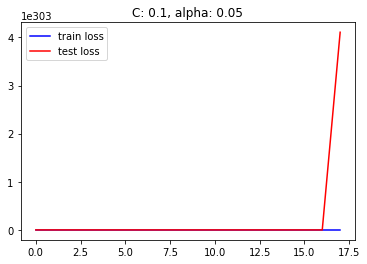

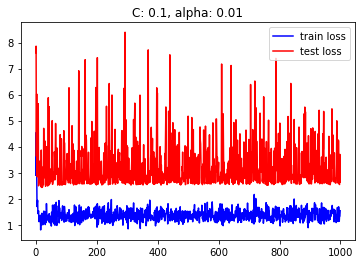

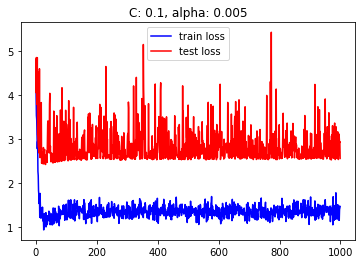

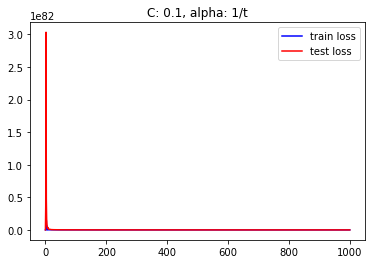

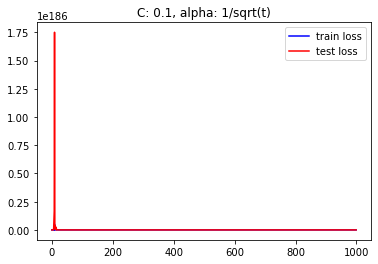

In [24]:
alphas = [0.05, 0.01, 0.005, '1/t', '1/sqrt(t)']

for alpha in alphas:    
    theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha=alpha, lambda_reg=10**-2, num_epoch=1000, eta0=False)
    
    num_epoch = 1000

    train_loss_hist = np.zeros(num_epoch)
    test_loss_hist = np.zeros(num_epoch)
    
    loss_hist = loss_hist[:, -1]
    
    for step in range(num_epoch):
        test_loss_hist[step] = compute_square_loss(X_test, y_test, theta_hist[step, 1, :])
    
    plt.title('C: 0.1, alpha: {}'.format(alpha))
    plt.plot(np.arange(num_epoch), loss_hist, color = 'blue', label = 'train loss')
    plt.plot(np.arange(num_epoch), test_loss_hist, color = 'red', label = 'test loss')
    plt.legend()
    plt.show()

In [25]:
#######################################
### Stochastic gradient descent : C = 0.01
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, eta0=False):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    # initialize step_size as alpha
    step_size = alpha
    C = 0.01
    for epoch in range(num_epoch):
        # check alpha and confirm final step_size
        if type(alpha) == float:
            step_size = alpha
        elif alpha == '1/sqrt(t)':
            step_size = C * 1/np.sqrt(epoch+1)
        elif alpha == '1/t':
            step_size = C * (1/(epoch+1))
        
        index = np.array(range(num_instances))
        np.random.shuffle(index)
        for j in index:

            # calculate theta and loss 
            theta_hist[epoch, j, :] = theta
            
            loss = compute_square_loss(X[j, :].reshape(1,X[j, :].shape[0]), y[j].reshape(-1,), theta)  
            loss_hist[epoch, j] = loss
            
            # update theta by gradient
            gradient = compute_regularized_square_loss_gradient(X[j, :].reshape(1,X[j, :].shape[0]), y[j].reshape(-1,), theta, lambda_reg)

            theta = theta - step_size * gradient

    return theta_hist, loss_hist
    

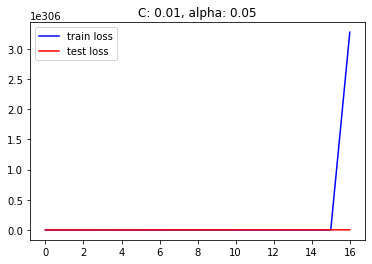

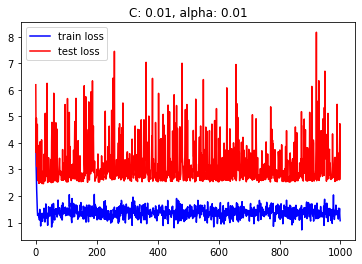

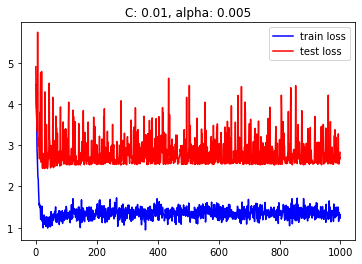

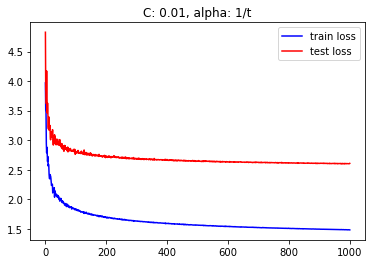

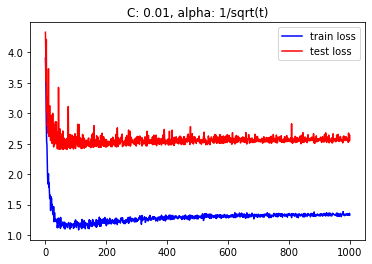

In [26]:
alphas = [0.05, 0.01, 0.005, '1/t', '1/sqrt(t)']

for alpha in alphas:    
    theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha=alpha, lambda_reg=10**-2, num_epoch=1000, eta0=False)
    
    num_epoch = 1000

    train_loss_hist = np.zeros(num_epoch)
    test_loss_hist = np.zeros(num_epoch)
    
    loss_hist = loss_hist[:, -1]
    
    for step in range(num_epoch):
        test_loss_hist[step] = compute_square_loss(X_test, y_test, theta_hist[step, 1, :])
    
    plt.title('C: 0.01, alpha: {}'.format(alpha))
    plt.plot(np.arange(num_epoch), loss_hist, color = 'blue', label = 'train loss')
    plt.plot(np.arange(num_epoch), test_loss_hist, color = 'red', label = 'test loss')
    plt.legend()
    plt.show()

In [27]:
#######################################
### Stochastic gradient descent : C = 0.01
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, eta0=False):

    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    #TODO
    # initialize step_size as alpha
    step_size = alpha
    C = 0.001
    
    for epoch in range(num_epoch):
        # check alpha and confirm final step_size
        if type(alpha) == float:
            step_size = alpha
        elif alpha == '1/sqrt(t)':
            step_size = C * 1/np.sqrt(epoch+1)
        elif alpha == '1/t':
            step_size = C * (1/(epoch+1))
        
        index = np.array(range(num_instances))
        np.random.shuffle(index)
        
        for j in index:

            # calculate theta and loss 
            theta_hist[epoch, j, :] = theta
            
            loss = compute_square_loss(X[j, :].reshape(1,X[j, :].shape[0]), y[j].reshape(-1,), theta)  
            loss_hist[epoch, j] = loss
            
            # update theta by gradient
            gradient = compute_regularized_square_loss_gradient(X[j, :].reshape(1,X[j, :].shape[0]), y[j].reshape(-1,), theta, lambda_reg)

            theta = theta - step_size * gradient

    return theta_hist, loss_hist
    

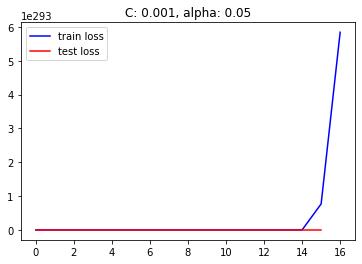

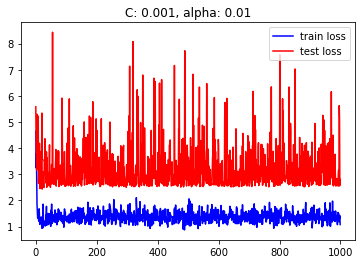

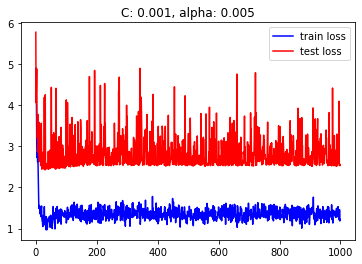

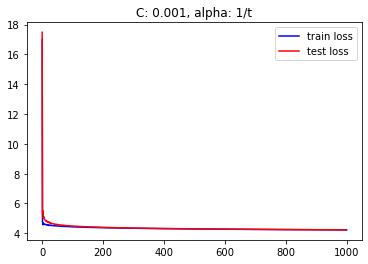

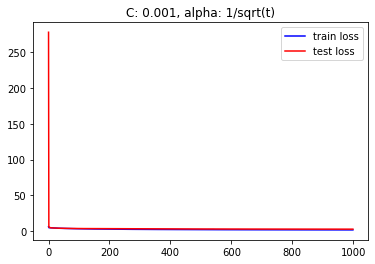

In [28]:
alphas = [0.05, 0.01, 0.005, '1/t', '1/sqrt(t)']

for alpha in alphas:    
    theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha=alpha, lambda_reg=10**-2, num_epoch=1000, eta0=False)
    
    num_epoch = 1000

    train_loss_hist = np.zeros(num_epoch)
    test_loss_hist = np.zeros(num_epoch)
    
    loss_hist = loss_hist[:, -1]
    
    for step in range(num_epoch):
        test_loss_hist[step] = compute_square_loss(X_test, y_test, theta_hist[step, 1, :])
    
    plt.title('C: 0.001, alpha: {}'.format(alpha))
    plt.plot(np.arange(num_epoch), loss_hist, color = 'blue', label = 'train loss')
    plt.plot(np.arange(num_epoch), test_loss_hist, color = 'red', label = 'test loss')
    plt.legend()
    plt.show()

### Q28~33
We are going to use the module SGDClassifier from scikit learn. In the code provided we have set a little example of its usage. By checking the online documentation3, make sure you understand the meaning of all the keyword arguments that were specified. We will keep the learning rate schedule and the maximum number of iterations fixed to the given values for all the problem. Note that scikit learn is actually implementing a fancy version of SGD to deal with the l1 penalty which is not differentiable everywhere, but we will not enter these details here.

### Q28. 
To evaluate the quality of our model we will use the classification error, which corresponds to the fraction of incorrectly labeled examples. For a given sample, the classification error is 1 if no example was labeled correctly and 0 if all examples were perfectly labeled. Using the method clf.predict() from the classifier write a function that takes as input an SGDClassifier which we will call clf, a design matrix X and a target vector y and returns the classification error. You should check that your function returns the same value as
1 - clf.score(X, y).

In [29]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def pre_process_mnist_01():
    X_mnist, y_mnist = fetch_openml('mnist_784', version=1, 
                                    return_X_y=True, as_frame=False)
    indicator_01 = (y_mnist == '0') + (y_mnist == '1')
    X_mnist_01 = X_mnist[indicator_01]
    y_mnist_01 = y_mnist[indicator_01]
    X_train, X_test, y_train, y_test = train_test_split(X_mnist_01, y_mnist_01,
                                                        test_size=0.33,
                                                        shuffle=False)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test)

    y_test = 2 * np.array([int(y) for y in y_test]) - 1
    y_train = 2 * np.array([int(y) for y in y_train]) - 1
    return X_train, X_test, y_train, y_test

In [30]:
def sub_sample(N_train, X_train, y_train):
    assert N_train <= X_train.shape[0]
    return X_train[:N_train, :], y_train[:N_train]

In [31]:
# Q28 code 
def classification_error(clf, X, y):
    ## TODO
    # initialize error result
    res = 0
    
    # predict
    y_pred = clf.predict(X)    

    # check if prediction is equal to actual value
    for i in range(y_pred.shape[0]):
        if y_pred[i] != y[i]:
            res += 1
    
    return res / y_pred.shape[0]        

In [32]:
# Checking with examples
X_train, X_test, y_train, y_test = pre_process_mnist_01()

clf = SGDClassifier(loss='log', max_iter=1000, 
                    tol=1e-3,
                    penalty='l1', alpha=0.01, 
                    learning_rate='invscaling', 
                    power_t=0.5,                
                    eta0=0.01,
                    verbose=0)

clf.fit(X_train, y_train)

test = classification_error(clf, X_test, y_test)
train = classification_error(clf, X_train, y_train)
print('train: ', train, end='\t')
print('test: ', test)

train:  0.001817814582912543	test:  0.001025010250102501


In [33]:
# You should check that your function returns the same value as 1 - clf.score(X, y).
# Checked that the result is same
alter_res = 1- clf.score(X_test, y_test)
print('Calculating by formula 1 - clf.score(X, y):{:.6f}'.format(alter_res))

Calculating by formula 1 - clf.score(X, y):0.001025


### To speed up computations we will subsample the data. Using the function sub sample, restrict X train and y train to N train = 100.

### Q29. 
Report the test classification error achieved by the logistic regression as a function of the regularization parameters α (taking 10 values between 10−4 and 10−1). You should make a plot with α as the x-axis in log scale. For each value of α, you should repeat the experiment 10 times so has to finally report the mean value and the standard deviation. You should use plt.errorbar to plot the standard deviation as error bars.

Mean:  [0.005453054530545306, 0.005207052070520706, 0.005002050020500205, 0.005084050840508405, 0.005186551865518656, 0.005084050840508405, 0.005145551455514554, 0.003341533415334153, 0.0028290282902829027, 0.002132021320213202] 

Std:  [0.0006686964506068099, 0.000602580502529687, 0.0009085083971365451, 0.0006067506595714942, 0.0006677530740017356, 0.0008392574616834244, 0.0006702657943530879, 0.0003182487637609681, 0.0004656751411070335, 0.00022828062168224768]


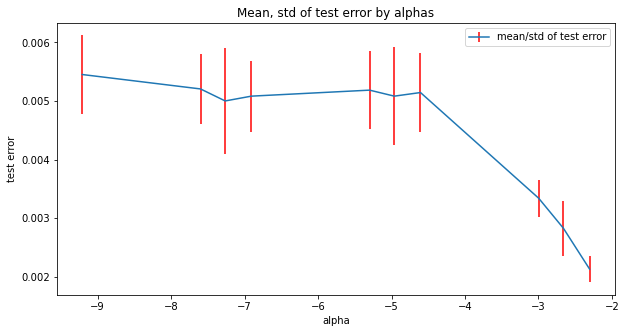

In [45]:
# To speed up computations we will subsample the data. 
# Using the function sub sample, restrict X train and y train to N train = 100
X_train, y_train = sub_sample(100, X_train, y_train)

# creating regularization parameters a (taking 10 values between 10−4 and 10−1))
alpha_list = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.007, 0.01, 0.05, 0.07, 0.1]

# initialzing mean, std list
error_mean, error_std = [], []

# iterate by each alpha
for alpha in alpha_list:
    # we need 10 experiment, and the result will be saved in experiment_error list
    experiment_error = []
    
    # iterate 10 times
    for i in range(10):
        # create clf 
        clf = SGDClassifier(loss='log', max_iter=1000, 
                        tol=1e-3,
                        penalty='l1', alpha=alpha, 
                        learning_rate='invscaling', 
                        power_t=0.5,                
                        eta0=0.01,
                        verbose=0)
        # fit
        clf.fit(X_train, y_train)
        
        # classification error
        experiment_error.append(classification_error(clf, X_test, y_test))
    
    # after 10 experiment, get mean and std 
    error_mean.append(np.mean(experiment_error))
    error_std.append(np.std(experiment_error))  

print('Mean: ', error_mean, '\n')
print('Std: ', error_std)
plt.figure(figsize = (10,5))
plt.errorbar(np.log(alpha_list), error_mean, yerr=error_std, ecolor = 'red', label = 'mean/std of test error')
# plt.errorbar(np.log(alpha_list), error_std, label = 'std of test error')

plt.title('Mean, std of test error by alphas')
plt.xlabel('alpha')
plt.ylabel('test error')
plt.legend()
plt.show()


### Q30. 
Which source(s) of randomness are we averaging over by repeating the experiment?


<b> Ans) Randomness comes from sub-sampling train data(restrict X train and y train). Shuffling of the training set on random draws of the successive training points depending on what we implemented.

Also, randomness comes from parameter λ initialization for the gradient descent. (unless you don't use a random initialization but for instance a zero initialization) </b>

### Q31. 
What is the optimal value of the parameter α among the values you tested?

In [46]:
print('Optimal value a = {},\nby having both the lowest mean error of {:.4f} and std error of {:.4f}'.\
      format(alpha_list[np.argmin(error_mean)], np.min(error_mean), np.min(error_std)))

Optimal value a = 0.1,
by having both the lowest mean error of 0.0021 and std error of 0.0002


### Q32. 
Finally, for one run of the fit for each value of α plot the value of the fitted θ. You can access it via clf.coef , and should reshape the 764 dimensional vector to a 28 × 28 arrray to visualize it with plt.imshow. Defining scale = np.abs(clf.coef ).max(), you can use the following keyword arguments (cmap=plt.cm.RdBu, vmax=scale, vmin=-scale) which will set the colors nicely in the plot. You should also use a plt.colorbar() to visualize the values associated with the colors.

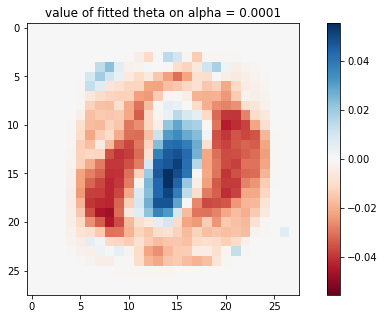

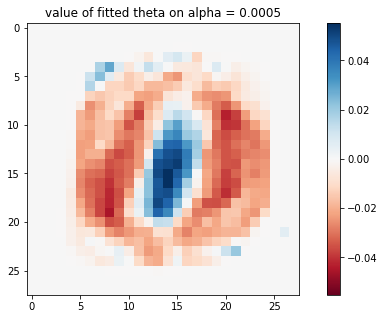

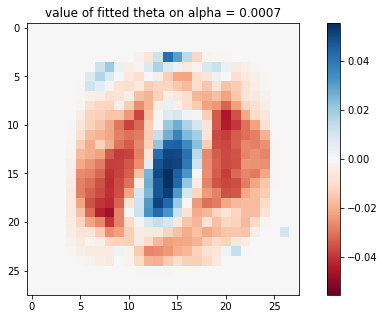

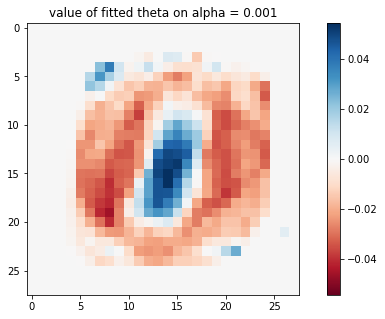

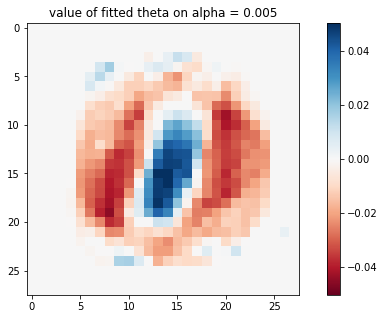

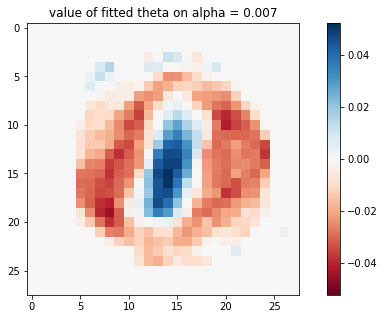

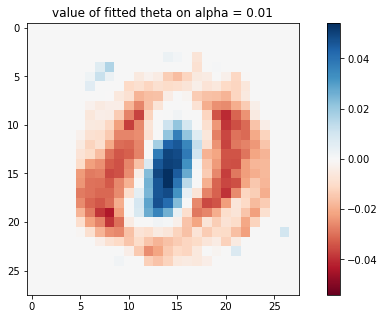

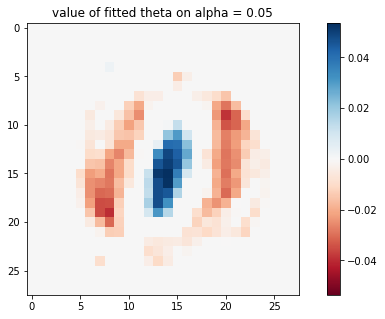

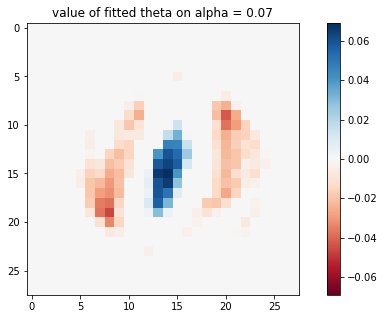

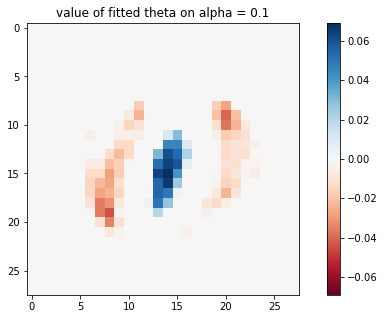

In [48]:
# Finally, for one run of the fit for each value of α plot the value of the fitted θ
alpha_list = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.007, 0.01, 0.05, 0.07, 0.1]

# iterate by each alpha
for alpha in alpha_list:
    # create clf 
    clf = SGDClassifier(loss='log', max_iter=1000, 
                    tol=1e-3,
                    penalty='l1', alpha=alpha, 
                    learning_rate='invscaling', 
                    power_t=0.5,                
                    eta0=0.01,
                    verbose=0)
    # fit
    clf.fit(X_train, y_train)
    
    # You can access it via clf.coef , and should reshape the 764 dimensional vector to a 28 × 28 arrray
    theta = clf.coef_
    theta_reshaped = theta.reshape(28,28)
    
    # Defining scale = np.abs(clf.coef ).max(), you can use the following keyword arguments 
    #(cmap=plt.cm.RdBu, vmax=scale, vmin=-scale) which will set the colors nicely in the plot. 
    # You should also use a plt.colorbar() to visualize the values associated with the colors.
    scale = np.abs(clf.coef_).max()
    
    # to visualize it with plt.imshow.
    
    plt.figure(figsize = (10,5))
    plt.imshow(theta_reshaped, cmap=plt.cm.RdBu, vmax=scale, vmin=-scale)
    plt.title('value of fitted theta on alpha = {}'.format(alpha))
    plt.colorbar()
    plt.show()

### Q33. 
What can you note about the pattern in θ? What can you note about the effect of the regularization?


<b> Ans) As alpha gets larger, image '0' gets more clear and showing less blurred images.  
This makes sense since we are using L1 regularization and L1 regularization acts as feature selection method. 
Larget regularization yields sparse coefficients, and L1 regularization makes coefficients shrinks towards to actual zeros. (So, there would be more zero coeeficients)</b>